In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder
from sklearn.pipeline import Pipeline

In [6]:
breast_cancer = pd.read_csv(r'C:\Users\19F19112\Downloads\Rayan\data.csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
breast_cancer.shape

(569, 33)

In [9]:
breast_cancer.shape

(569, 33)

In [10]:
breast_cancer.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [11]:
breast_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
for field in breast_cancer.columns:
    amount = np.count_nonzero(breast_cancer[field] == 0)
    
    if amount > 0:
        print('Number of 0-entries for "{field_name}" feature: {amount}'.format(
            field_name=field,
            amount=amount
        ))

Number of 0-entries for "concavity_mean" feature: 13
Number of 0-entries for "concave points_mean" feature: 13
Number of 0-entries for "concavity_se" feature: 13
Number of 0-entries for "concave points_se" feature: 13
Number of 0-entries for "concavity_worst" feature: 13
Number of 0-entries for "concave points_worst" feature: 13


In [13]:
# Features "id" and "Unnamed: 32" are not useful 
feature_names = breast_cancer.columns[2:-1]
X = breast_cancer[feature_names]
# "diagnosis" feature is our class which I wanna predict
y = breast_cancer.diagnosis

In [14]:
class_le = LabelEncoder()
# M -> 1 and B -> 0
y = class_le.fit_transform(breast_cancer.diagnosis.values)

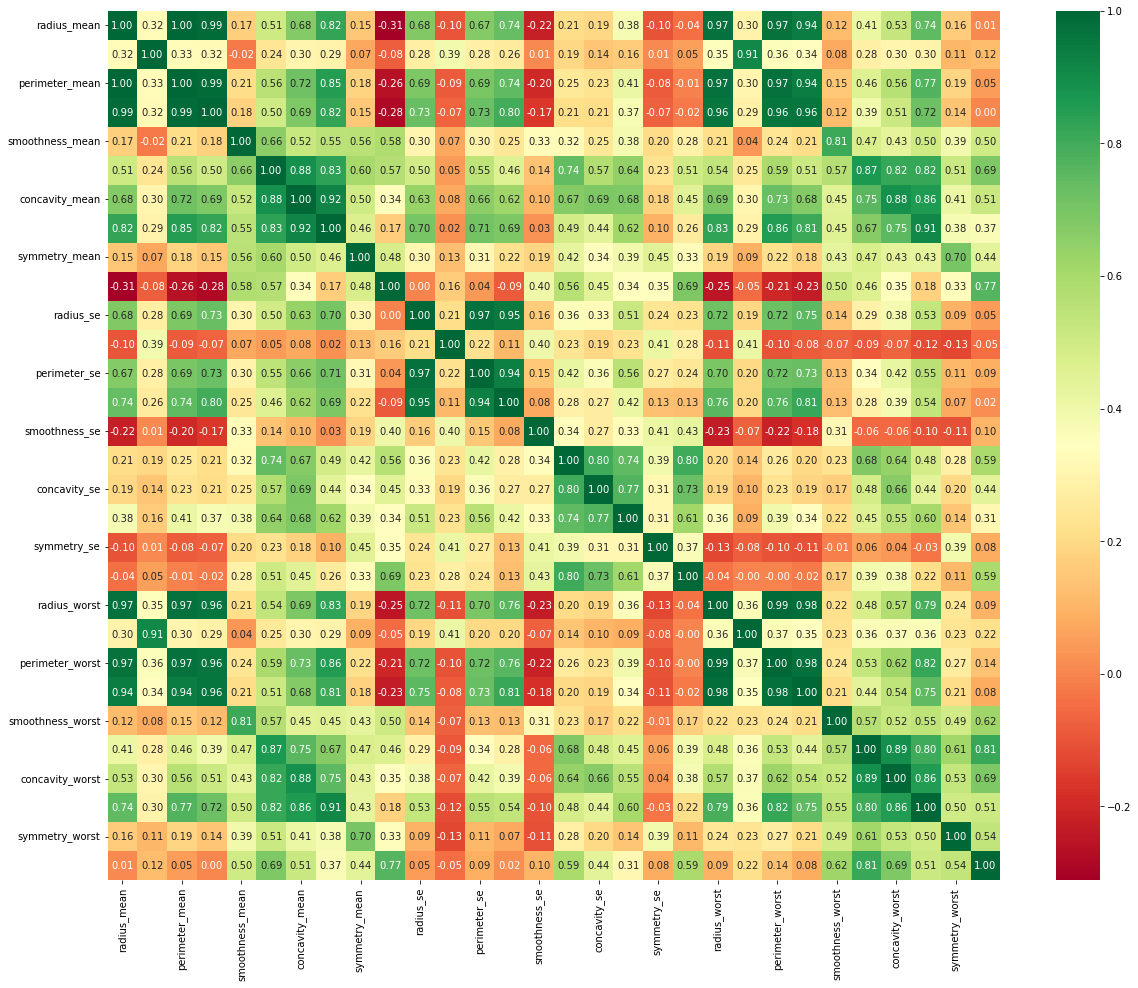

In [15]:
sns.heatmap(
    data=X.corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)

fig = plt.gcf()
fig.set_size_inches(20, 16)

plt.show()

In [16]:
pipe = Pipeline(steps=[
    ('preprocess', StandardScaler()),
    ('classification', MLPClassifier())
])

In [17]:
random_state = 42
mlp_activation = ['identity', 'logistic', 'tanh', 'relu']
mlp_solver = ['lbfgs', 'sgd', 'adam']
mlp_max_iter = range(1000, 10000, 1000)
mlp_alpha = [1e-4, 1e-3, 0.01, 0.1, 1]
preprocess = [Normalizer(), MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer()]

In [18]:
mlp_param_grid = [
    {
        'preprocess': preprocess,
        'classification__activation': mlp_activation,
        'classification__solver': mlp_solver,
        'classification__random_state': [random_state],
        'classification__max_iter': mlp_max_iter,
        'classification__alpha': mlp_alpha
    }
]

In [19]:
# strat_k_fold = StratifiedKFold(
#     n_splits=10,
#     random_state=42
# )

# mlp_grid = GridSearchCV(
#     pipe,
#     param_grid=mlp_param_grid,
#     cv=strat_k_fold,
#     scoring='f1',
#     n_jobs=-1,
#     verbose=2
# )

# mlp_grid.fit(X, y)

# # Best MLPClassifier parameters
# print(mlp_grid.best_params_)
# # Best score for MLPClassifier with best parameters
# print('\nBest F1 score for MLP: {:.2f}%'.format(mlp_grid.best_score_ * 100))

# best_params = mlp_grid.best_params_

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.32
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(386, 30) (386,)
(183, 30) (183,)


In [21]:
scaler = StandardScaler()

print('\nData preprocessing with {scaler}\n'.format(scaler=scaler))

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

mlp = MLPClassifier(
    max_iter=1000,
    alpha=0.1,
    activation='logistic',
    solver='adam',
    random_state=42
)
mlp.fit(X_train_scaler, y_train)

mlp_predict = mlp.predict(X_test_scaler)
mlp_predict_proba = mlp.predict_proba(X_test_scaler)[:, 1]

print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP AUC: {:.2f}%'.format(roc_auc_score(y_test, mlp_predict_proba) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, mlp_predict))
print('MLP Training set score: {:.2f}%'.format(mlp.score(X_train_scaler, y_train) * 100))
print('MLP Testing set score: {:.2f}%'.format(mlp.score(X_test_scaler, y_test) * 100))


Data preprocessing with StandardScaler()

MLP Accuracy: 99.45%
MLP AUC: 99.86%
MLP Classification report:

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       119
           1       1.00      0.98      0.99        64

    accuracy                           0.99       183
   macro avg       1.00      0.99      0.99       183
weighted avg       0.99      0.99      0.99       183

MLP Training set score: 98.45%
MLP Testing set score: 99.45%


<AxesSubplot:>

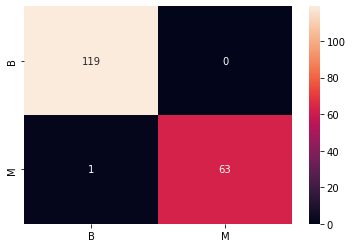

In [22]:
outcome_labels = sorted(breast_cancer.diagnosis.unique())

# Confusion Matrix for MLPClassifier
sns.heatmap(
    confusion_matrix(y_test, mlp_predict),
    annot=True,
    fmt="d",
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

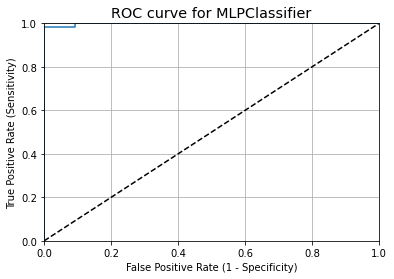

In [23]:
# ROC for MLPClassifier
fpr, tpr, thresholds = roc_curve(y_test, mlp_predict_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for MLPClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)